In [1]:
# conda base 

# Data manipulation 
import pandas as pd 
import numpy as np

# Data viz
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

This notebook shows the patters in the sequence space when we map the taxonomy

# load data and plot functions

In [2]:
# load seqs annots
df_annot = pd.read_csv("../results/tables/df_annot_all.csv", sep = "\t")

# load likelihoods from carp and merge dset
df_plm = pd.read_pickle("../results/embeddings/all_plm.pkl")
df_plm = df_plm[["seq_id", "carp640M_logp"]]
df_annot_plm = pd.merge(df_annot, df_plm, on = "seq_id")

# load tsne coords and merge annots
df_sbl = pd.read_csv("../results/dim_redo/splitted_classes/tsne/tsne_2d_plm_sbl_esm1b.csv")
df_sbl = df_sbl.merge(df_annot_plm, on = "seq_id")
df_mbl = pd.read_csv("../results/dim_redo/splitted_classes/tsne/tsne_2d_plm_mbl_esm1b.csv")
df_mbl = df_mbl.merge(df_annot_plm, on = "seq_id")

# load and merge representative dsets
df_sbl90 = pd.read_csv("../results/dim_redo/splitted_classes/tsne/tsne_2d_clust90_sbl_esm1b.csv")
df_mbl90 = pd.read_csv("../results/dim_redo/splitted_classes/tsne/tsne_2d_clust90_mbl_esm1b.csv")
df_sbl90 = df_sbl90.merge(df_annot, on = "seq_id")
df_mbl90 = df_mbl90.merge(df_annot, on = "seq_id")

# remove taxx annots
all_dfs = [df_sbl, df_mbl, df_sbl90, df_mbl90]
for df in all_dfs:
    df["Domain"] = df.Domain.str.replace("d__", "")
    df["Phylum"] = df.Phylum.str.replace("p__", "")
    df["Class"] = df.Class.str.replace("c__", "")
    df["Order"] = df.Order.str.replace("o__", "")
    df["Family"] = df.Family.str.replace("f__", "")
    df["Genus"] = df.Genus.str.replace("g__", "")
    df["Species"] = df.Species.str.replace("s__", "")

# per class datasets 
df_sbl_a = df_sbl[df_sbl.bla_class == "Class A"]
df_sbl_c = df_sbl[df_sbl.bla_class == "Class C"]
df_sbl_d = df_sbl[df_sbl.bla_class == "Class D"]

In [3]:
def do_iscatter(df, annot):
    
    """
    do a scatterplot given a df and hue
    """

    # plot
    fig = px.scatter(
    df, x = 'tSNE1_esm1b', y = 'tSNE2_esm1b',
    height = 700, width = 800, color = annot,
    hover_name = "protein_name", 
    color_discrete_sequence = px.colors.qualitative.Plotly,
    hover_data = [
        "#name", "protein_family_header", "length", 'protein_family',"protein_family_header", 'bla_class'])

    fig.update_traces(marker=dict(size=8, line=dict(width=1,color='black')),selector=dict(mode='markers'))
    fig.update_layout(template="plotly_white")
    #fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='LightGrey',mirror=True)
    #fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='LightGrey', mirror=True)
    fig.update_yaxes(showline=True, linewidth=1, linecolor='LightGrey')
    fig.update_xaxes(showline=True, linewidth=1, linecolor='LightGrey')
    fig.show()

In [4]:
def do_scatter_plt(df, hue):
    plt.figure(figsize=(5,5))
    ax = sns.scatterplot(
        data = df.sort_values(by=hue, key=lambda x: x.map(x.value_counts()), ascending=False), 
        x="tSNE1_esm1b", y="tSNE2_esm1b", 
        hue=hue, alpha=0.1, edgecolor = None, 
        palette="tab10")
    #plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.title(hue)
    # plt.grid(0.1, color = "lightgrey", linestyle = "-")
    
    h, l = ax.get_legend_handles_labels()
    counts = df[hue].value_counts().reindex(l)
    l = [f'{yn} ({c})' for yn,c in counts.iteritems()]
    ax.legend(h,l, title="Top 10 taxa", loc='center left', bbox_to_anchor=(1, 0.5))

# SBL

In [5]:
taxa_lst = ["Domain", "Phylum", "Class", "Order", "Family", "Genus", "Species"]

print(f"Data for serin betalactamases")
for ele in taxa_lst:
    print(f"Number of unique taxa in {ele}: {len(df_sbl[ele].unique())}")

Data for serin betalactamases
Number of unique taxa in Domain: 3
Number of unique taxa in Phylum: 29
Number of unique taxa in Class: 49
Number of unique taxa in Order: 137
Number of unique taxa in Family: 285
Number of unique taxa in Genus: 1009
Number of unique taxa in Species: 3096


In [6]:
# filter top 10 taxa
for taxa in taxa_lst:
    top9 = list(df_sbl[taxa].value_counts()[:9].index)
    df_sbl.loc[~df_sbl[taxa].isin(top9), taxa] = "Other"

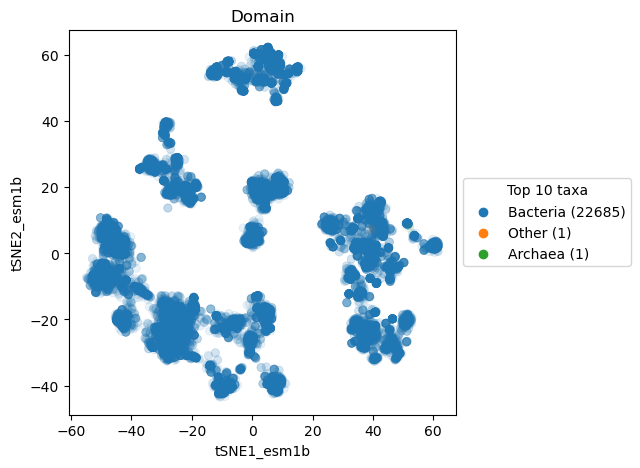

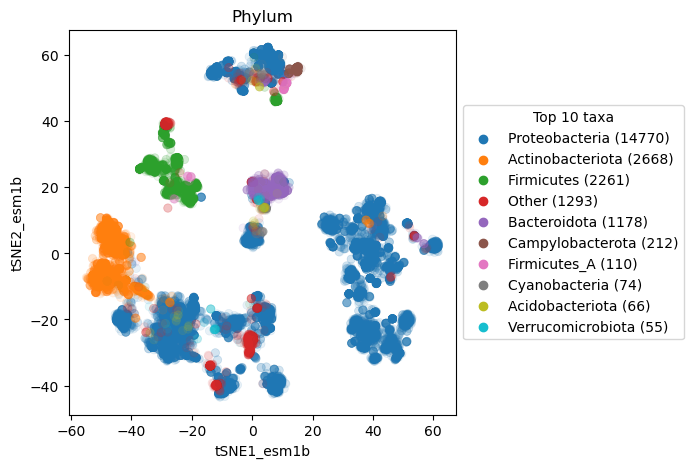

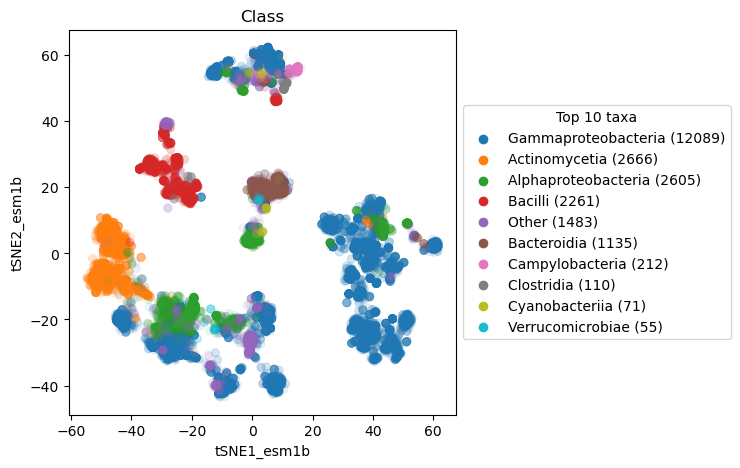

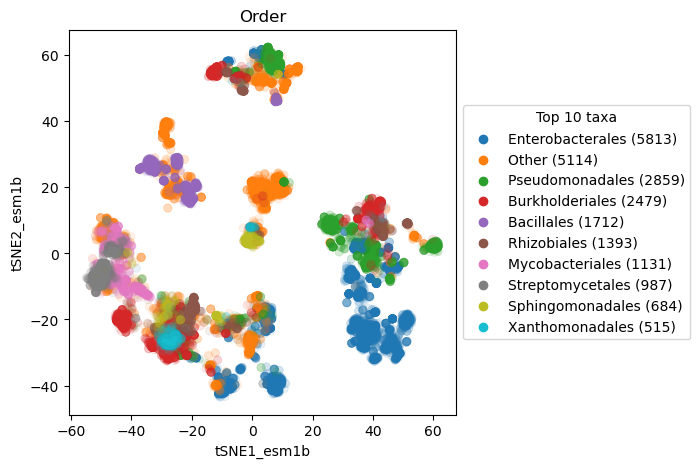

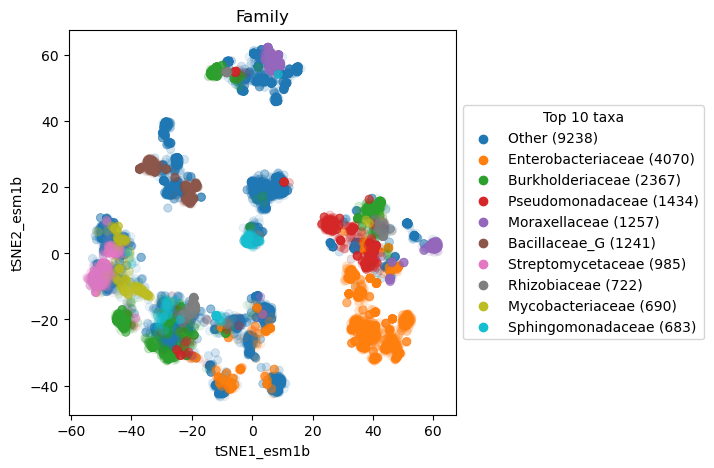

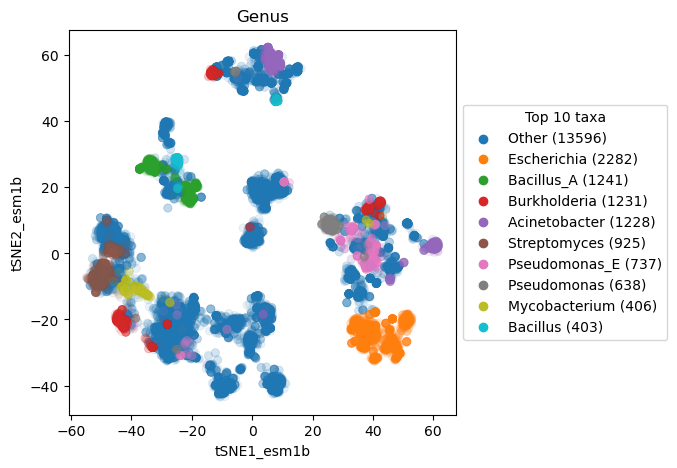

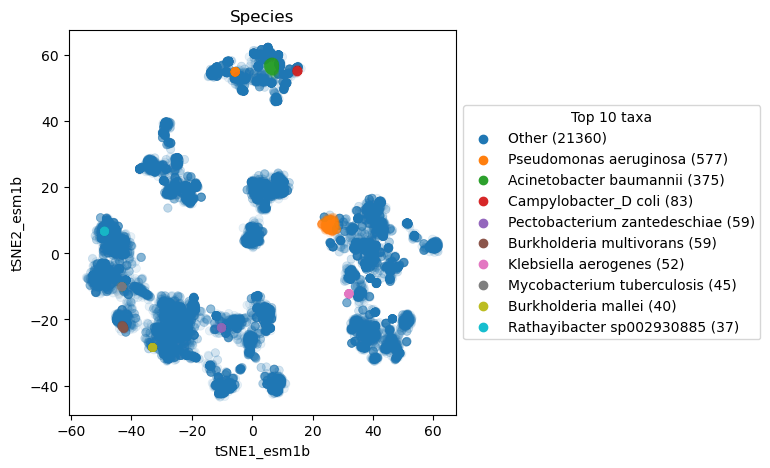

In [7]:
for tax in taxa_lst:
    do_scatter_plt(df_sbl, tax)

# SBL90

In [8]:
print(f"Data for serin betalactamases at 90% sequence indentity")
for ele in taxa_lst:
    print(f"Number of unique taxa in {ele}: {len(df_sbl90[ele].unique())}")


Data for serin betalactamases at 90% sequence indentity
Number of unique taxa in Domain: 2
Number of unique taxa in Phylum: 29
Number of unique taxa in Class: 49
Number of unique taxa in Order: 137
Number of unique taxa in Family: 283
Number of unique taxa in Genus: 999
Number of unique taxa in Species: 2963


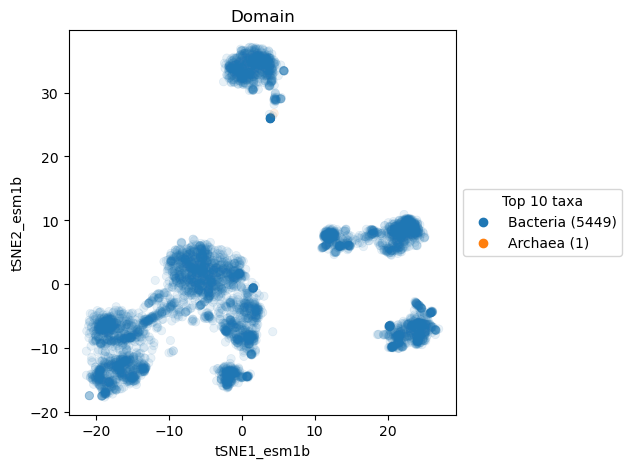

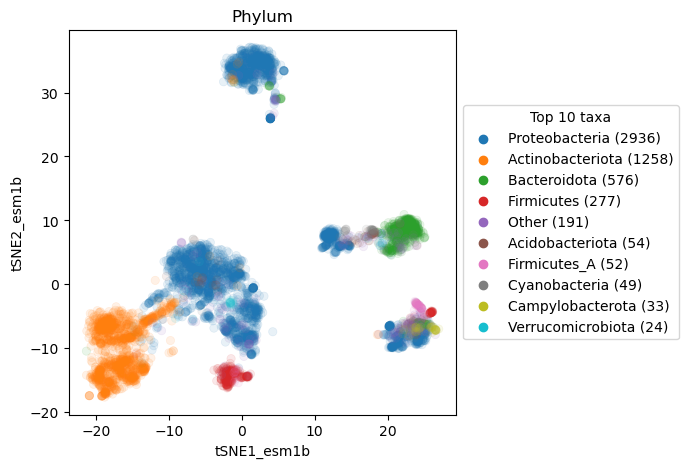

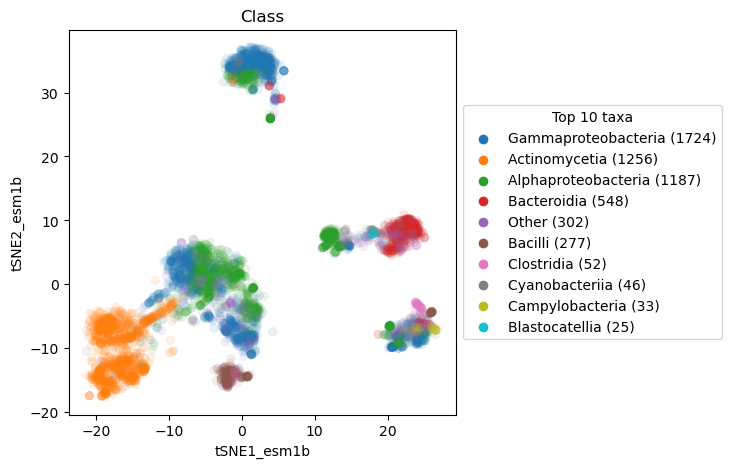

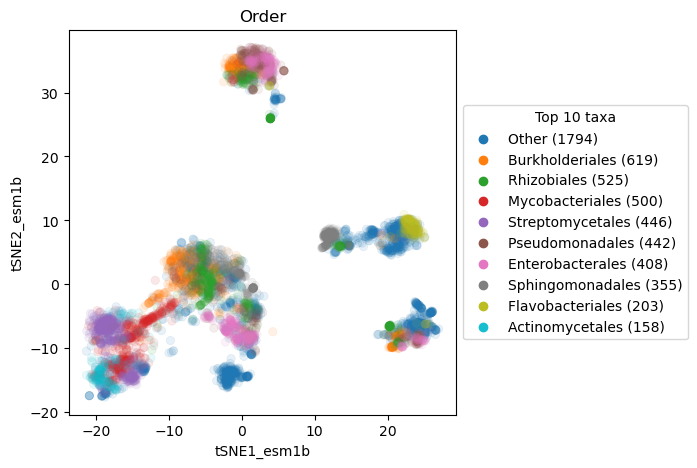

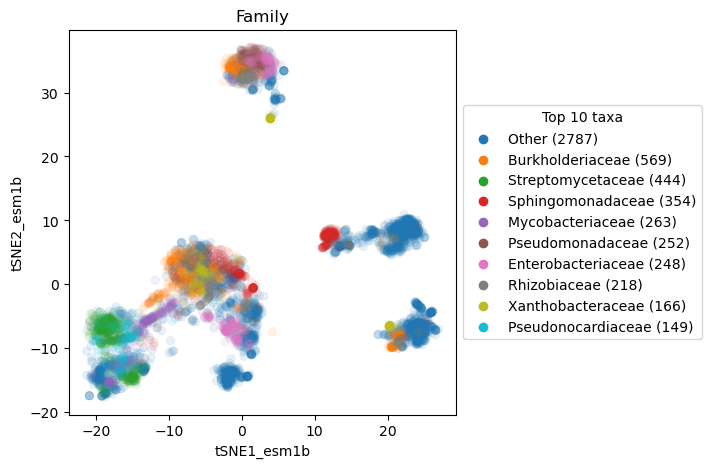

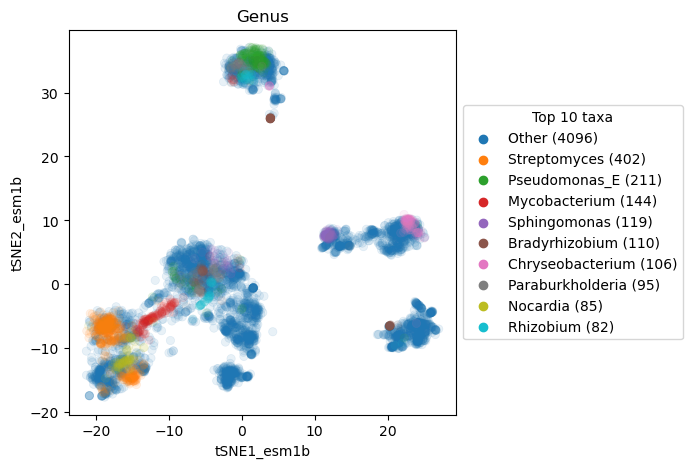

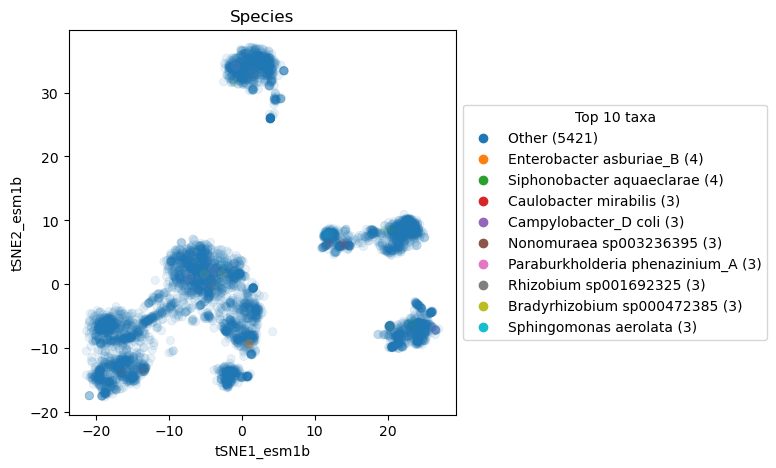

In [9]:
# filter top 10 taxa
for taxa in taxa_lst:
    top9 = list(df_sbl90[taxa].value_counts()[:9].index)
    df_sbl90.loc[~df_sbl90[taxa].isin(top9), taxa] = "Other"


for tax in taxa_lst:
    do_scatter_plt(df_sbl90, tax)

# Individual SBL 

/tmp/ipykernel_1565/4225817696.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5))


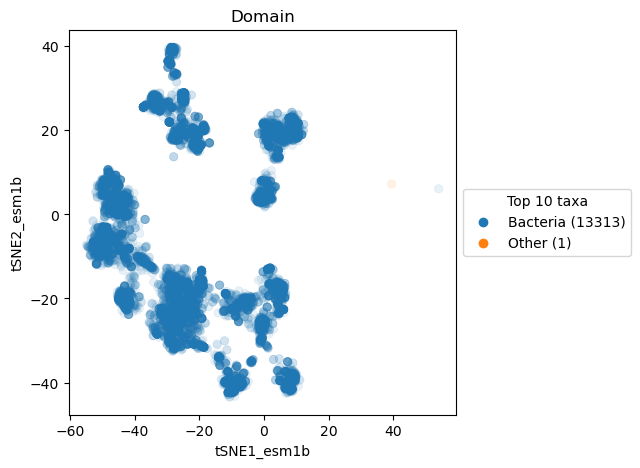

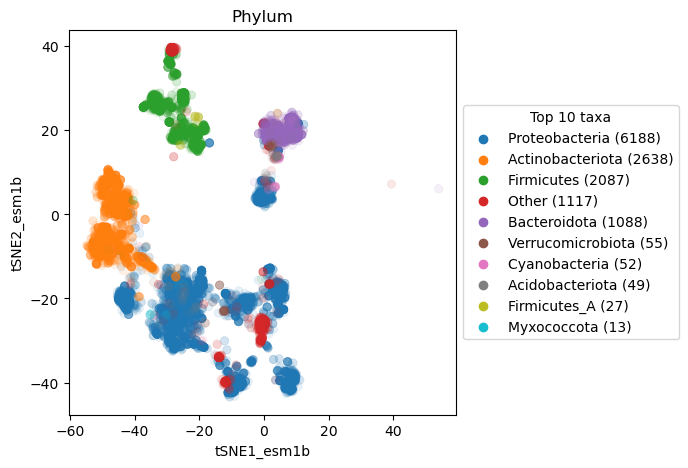

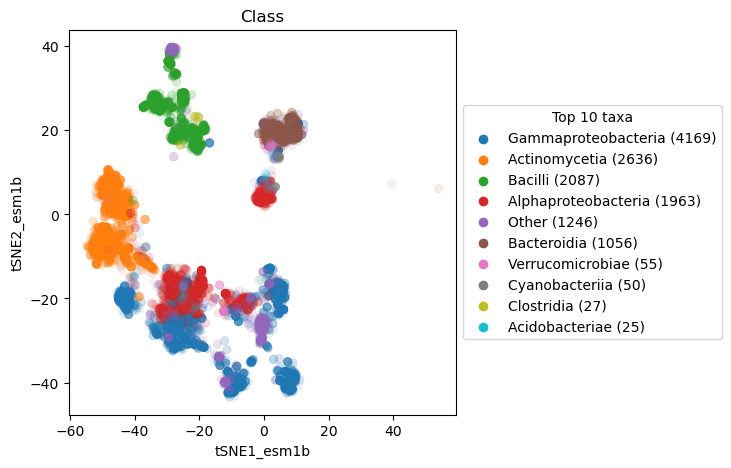

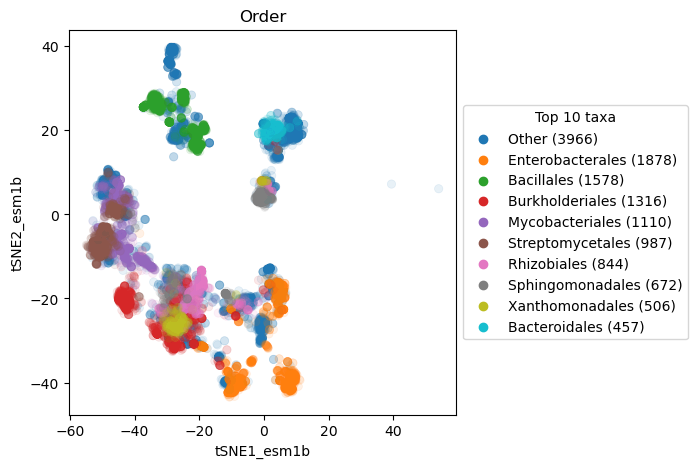

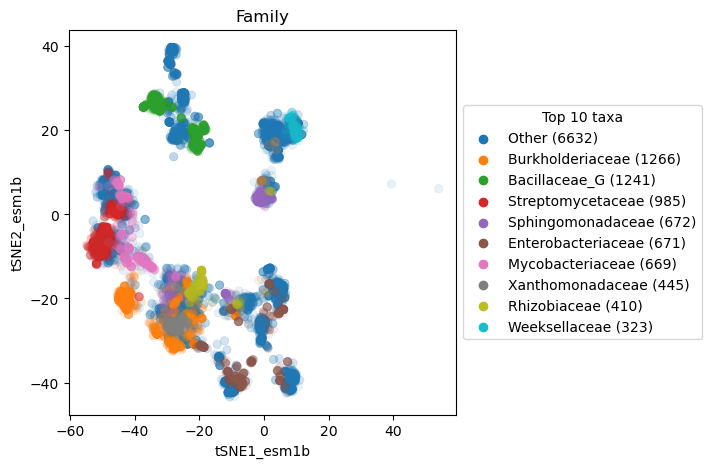

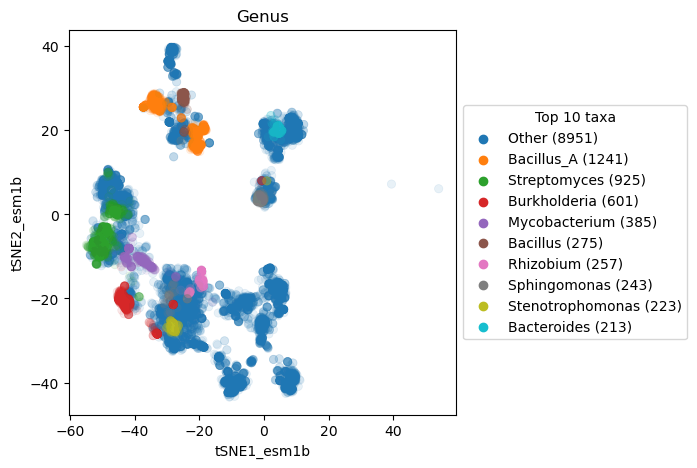

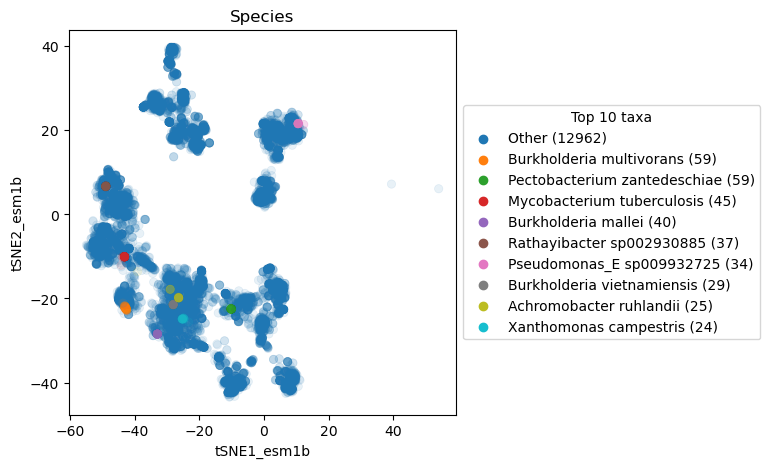

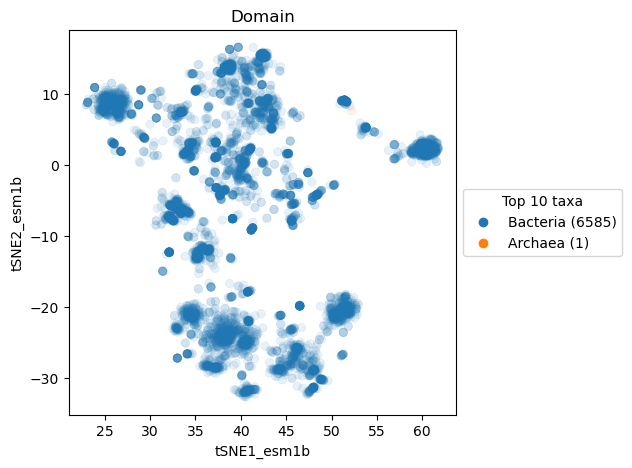

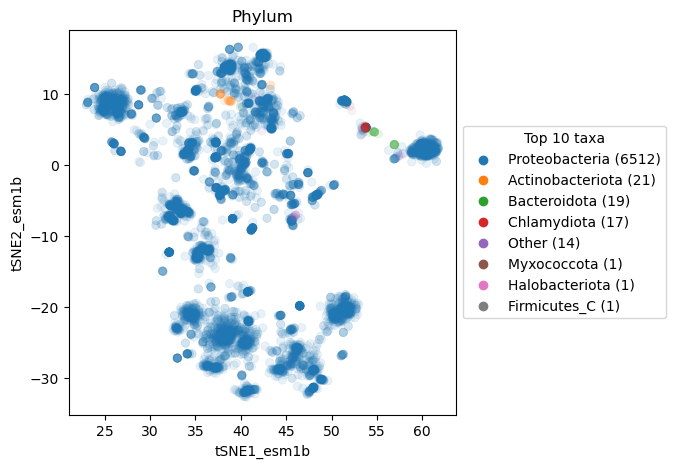

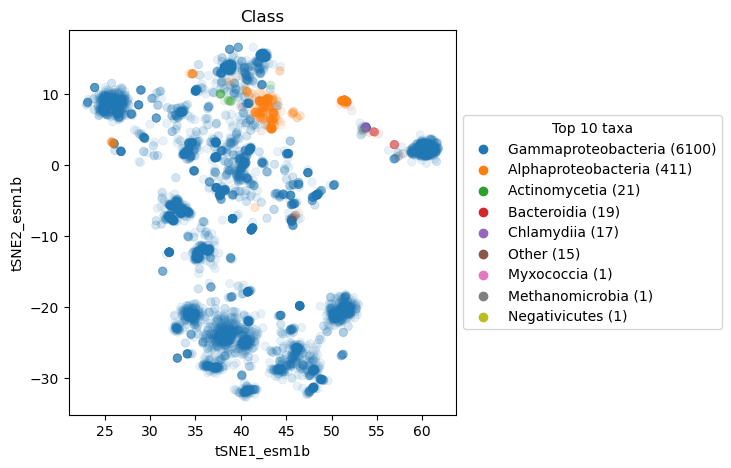

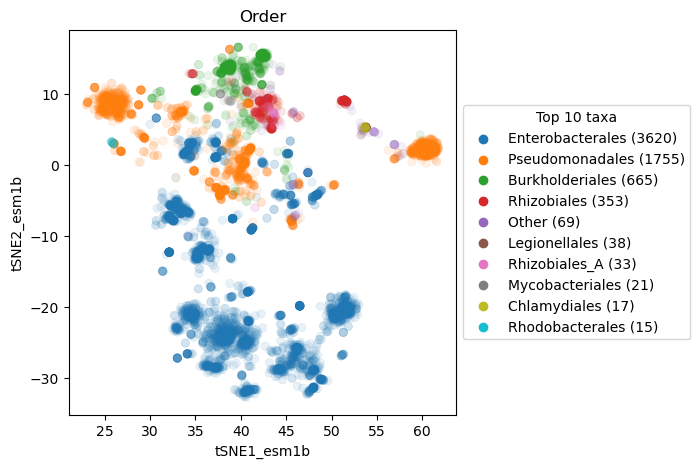

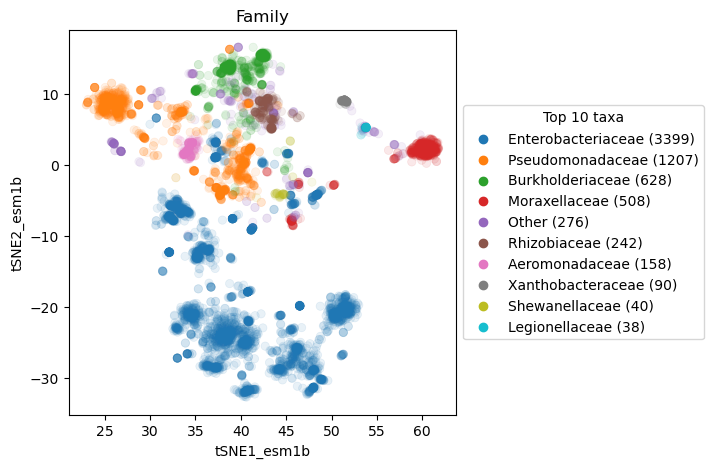

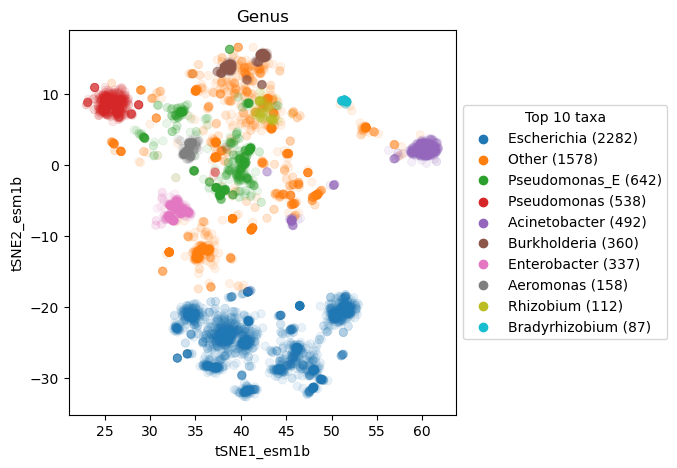

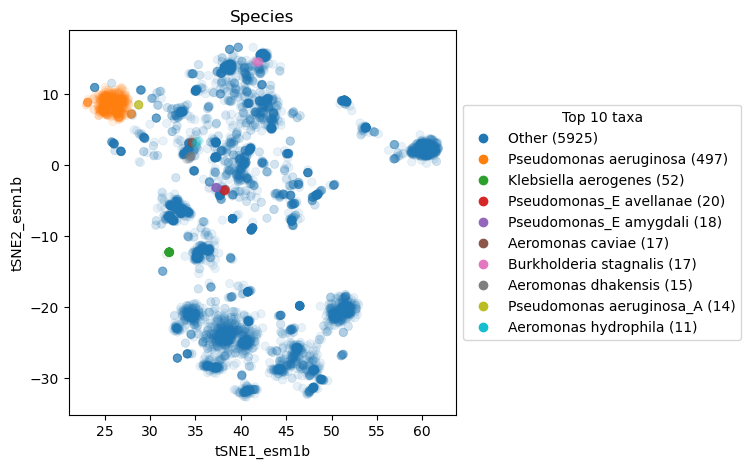

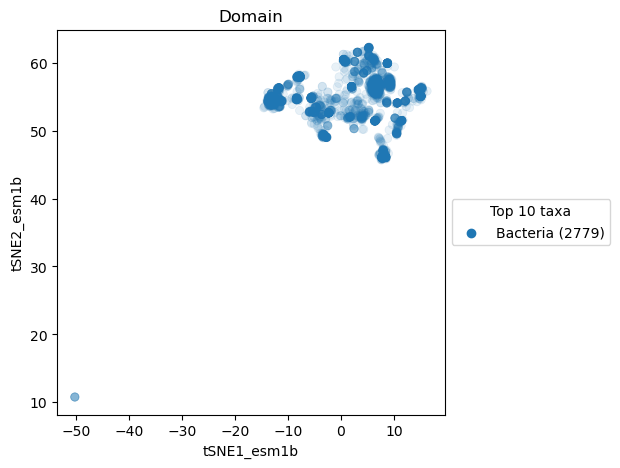

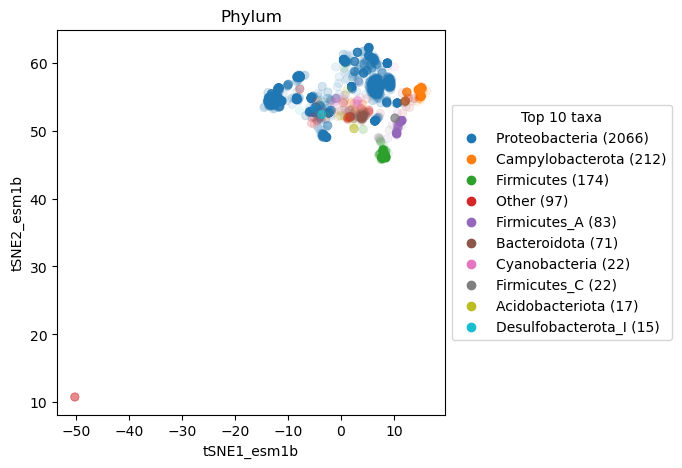

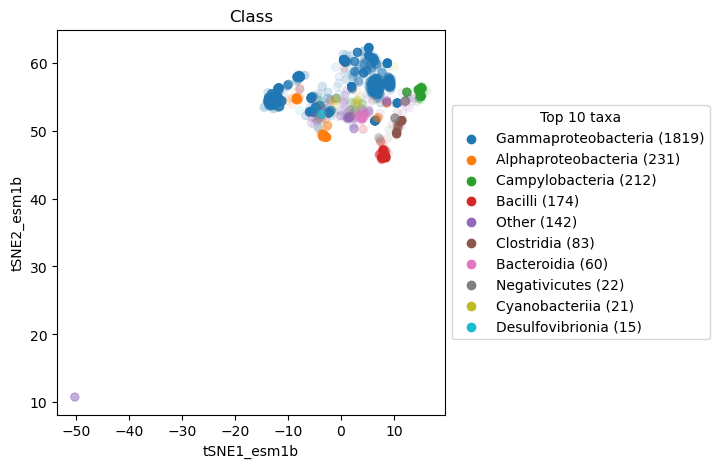

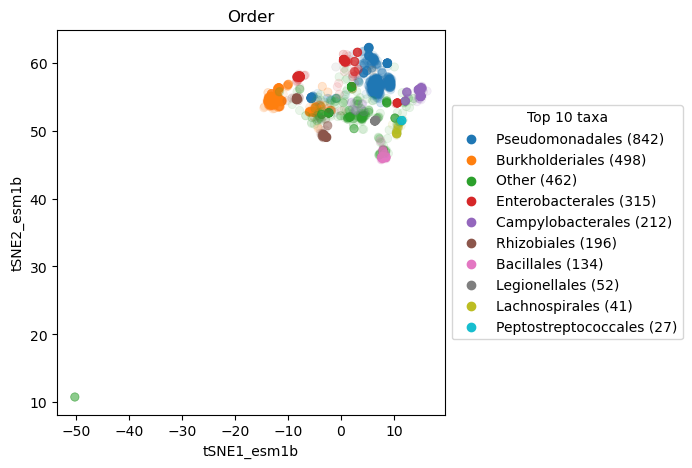

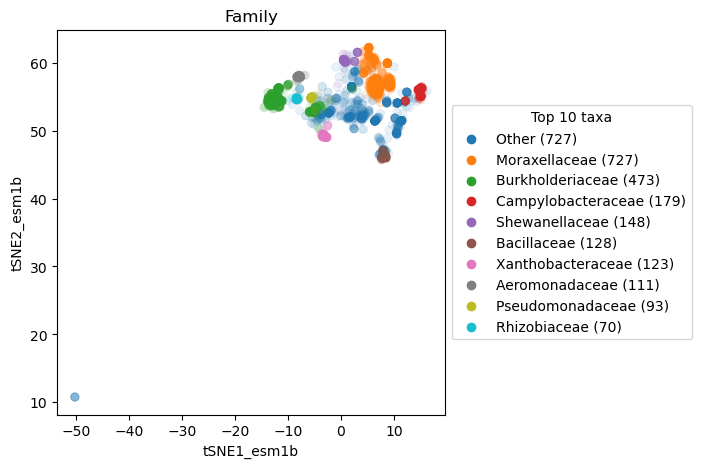

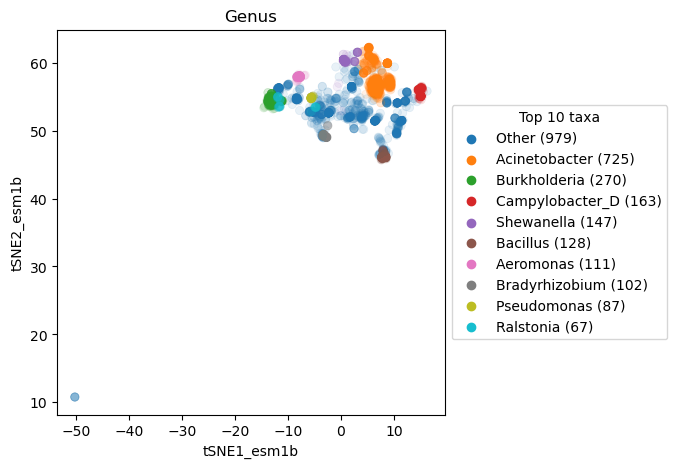

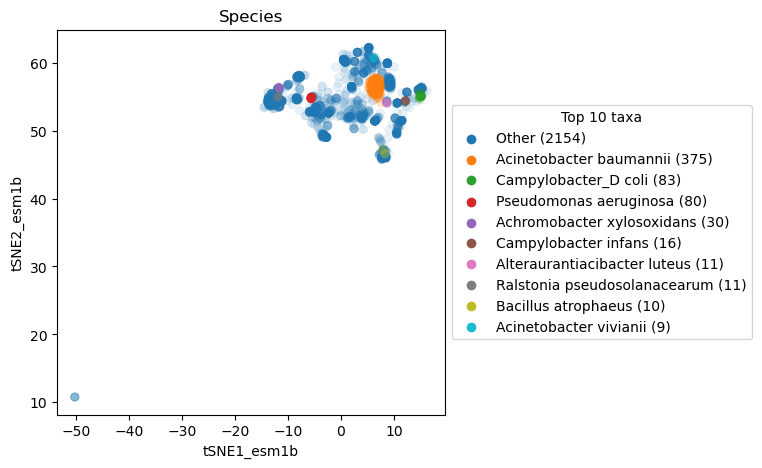

In [10]:
single_sbl = [df_sbl_a, df_sbl_c, df_sbl_d]

# filter top 10 taxa
for df in single_sbl:
    for taxa in taxa_lst:
        top9 = list(df[taxa].value_counts()[:9].index)
        df.loc[~df[taxa].isin(top9), taxa] = "Other"

# plot
for df in single_sbl:
    for tax in taxa_lst:
        do_scatter_plt(df, tax)

# MBL

In [11]:
print(f"Data for metalo betalactamases")
for ele in taxa_lst:
    print(f"Number of unique taxa in {ele}: {len(df_mbl[ele].unique())}")

Data for metalo betalactamases
Number of unique taxa in Domain: 2
Number of unique taxa in Phylum: 18
Number of unique taxa in Class: 31
Number of unique taxa in Order: 72
Number of unique taxa in Family: 135
Number of unique taxa in Genus: 363
Number of unique taxa in Species: 744


In [12]:
# filter top 10 taxa
for taxa in taxa_lst:
    top9 = list(df_mbl[taxa].value_counts()[:9].index)
    df_mbl.loc[~df_mbl[taxa].isin(top9), taxa] = "Other"

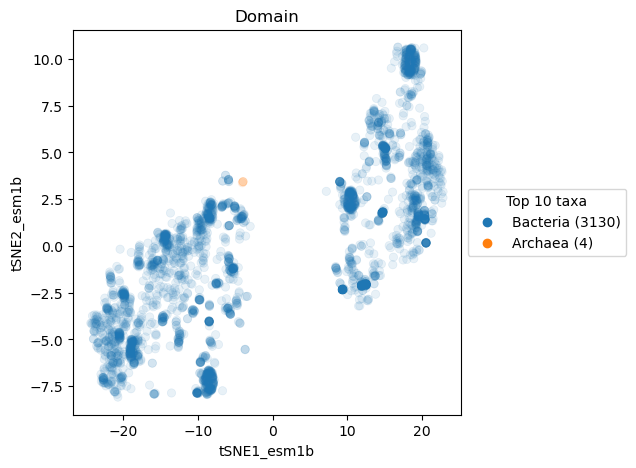

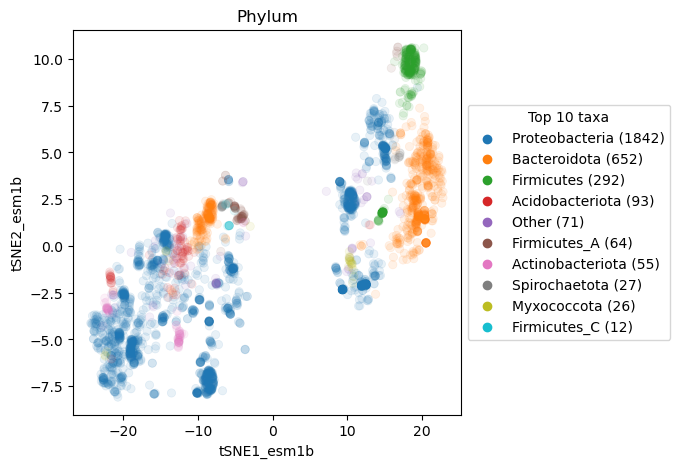

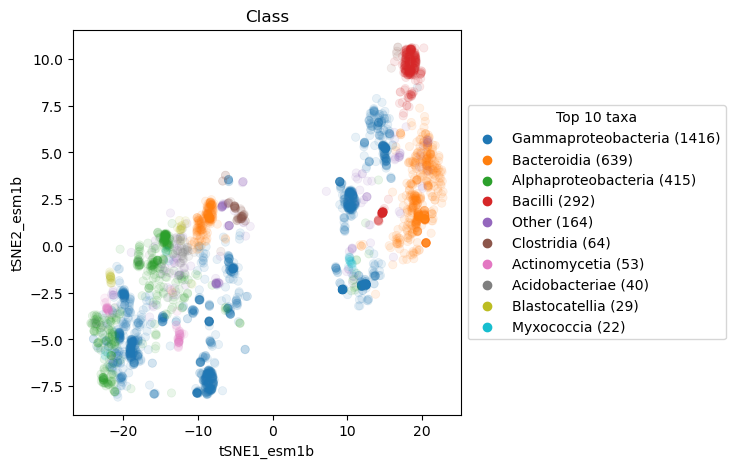

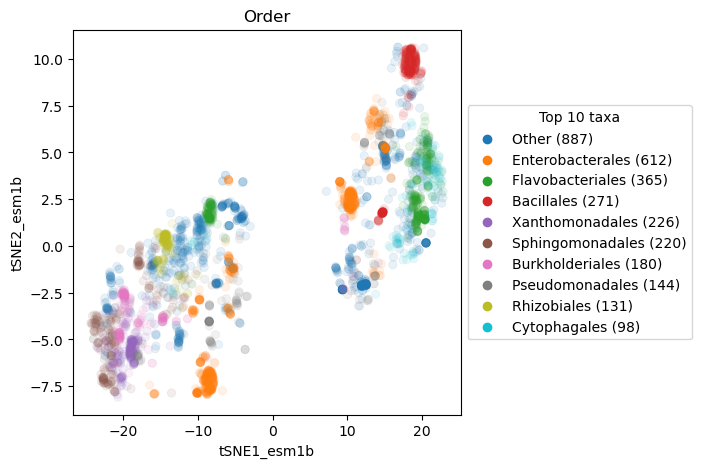

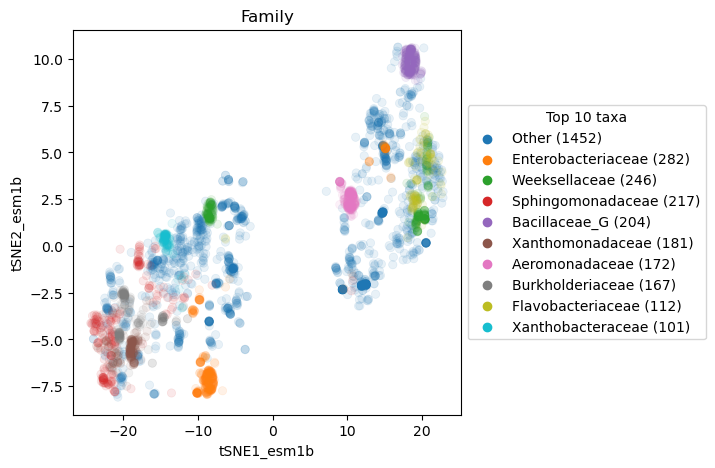

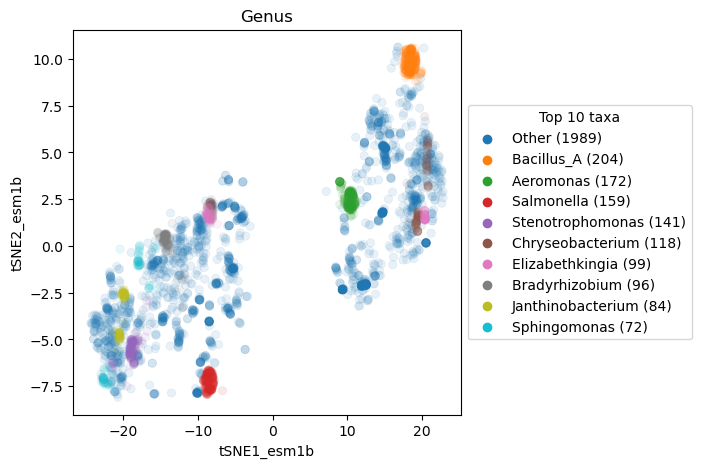

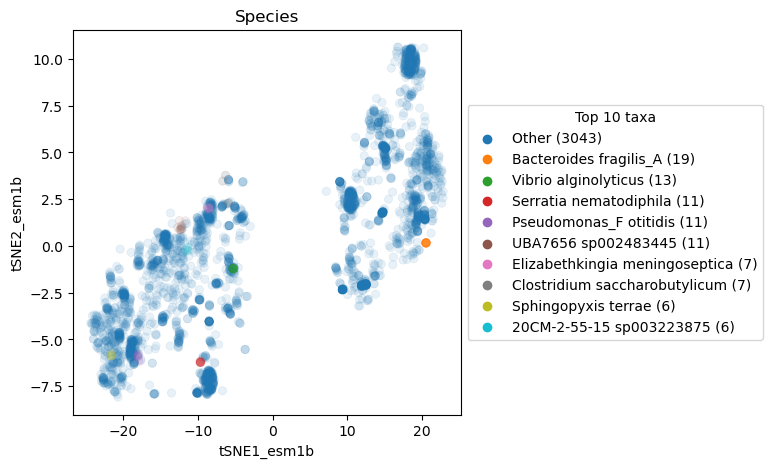

In [13]:
for tax in taxa_lst:
    do_scatter_plt(df_mbl, tax)

# MBL90

In [10]:
print(f"Data for metalo betalactamases at 90% sequence indentity")
for ele in taxa_lst:
    print(f"Number of unique taxa in {ele}: {len(df_mbl90[ele].unique())}")


Data for metalo betalactamases at 90% sequence indentity
Number of unique taxa in Domain: 2
Number of unique taxa in Phylum: 17
Number of unique taxa in Class: 29
Number of unique taxa in Order: 67
Number of unique taxa in Family: 129
Number of unique taxa in Genus: 354
Number of unique taxa in Species: 722


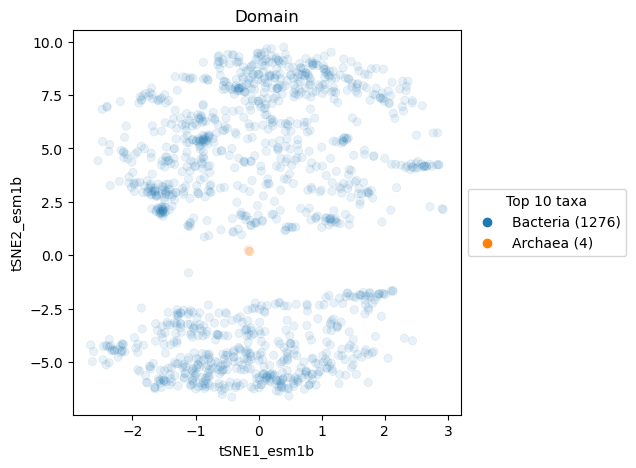

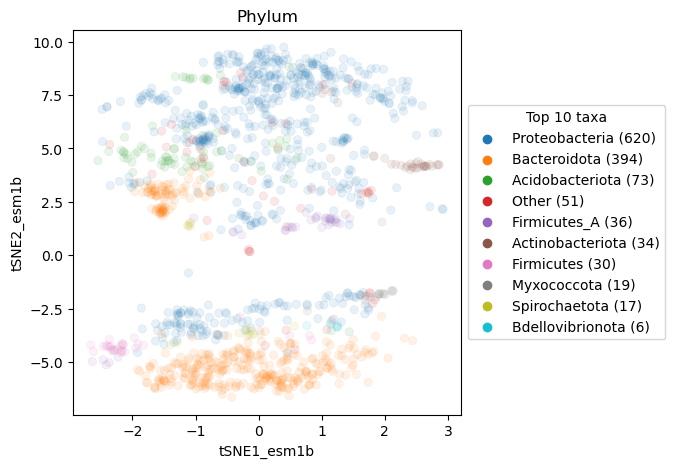

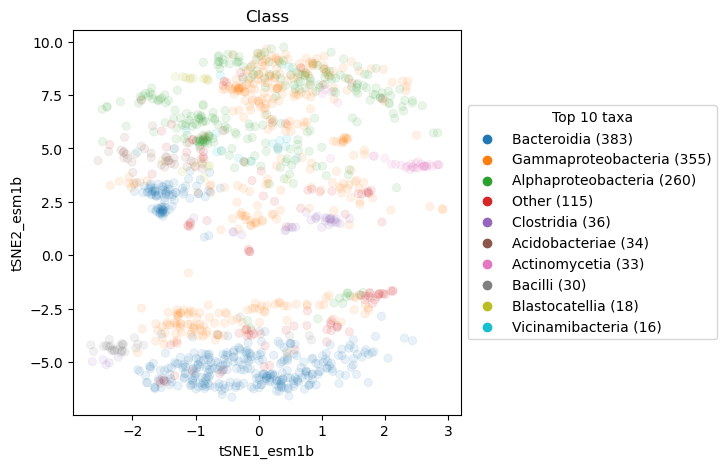

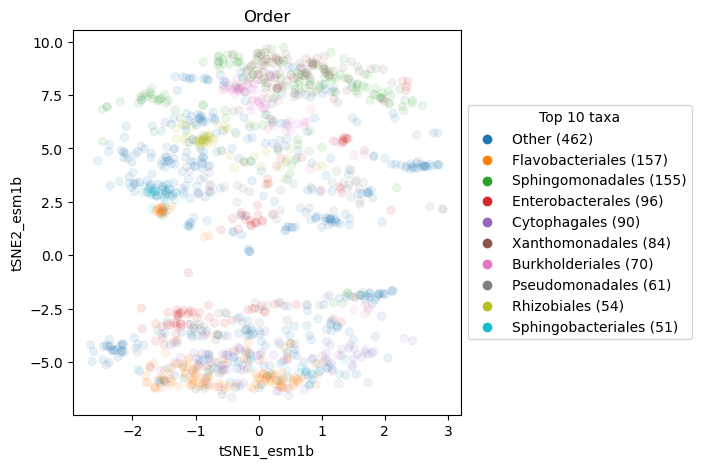

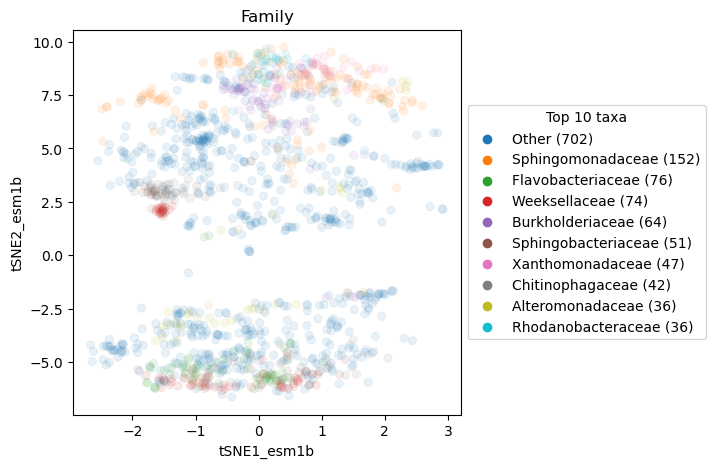

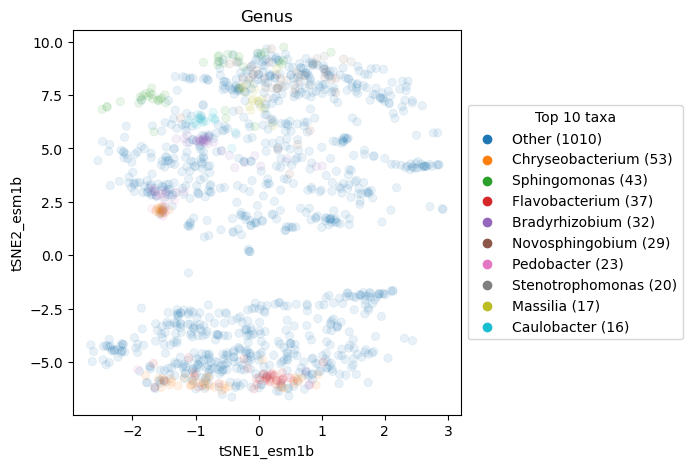

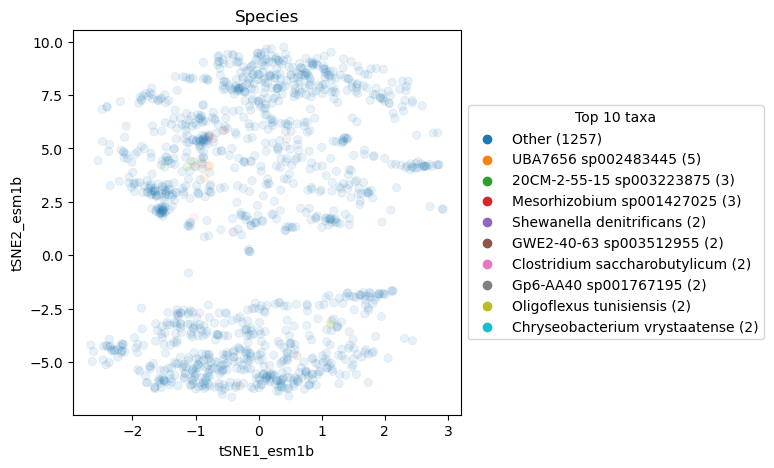

In [11]:
# filter top 10 taxa
for taxa in taxa_lst:
    top9 = list(df_mbl90[taxa].value_counts()[:9].index)
    df_mbl90.loc[~df_mbl90[taxa].isin(top9), taxa] = "Other"

for tax in taxa_lst:
    do_scatter_plt(df_mbl90, tax)

Fin